# Facial Keypoint Detection Kaggle Competition

Kaggle competition to detect eyes, mouth and nose in grayscaled images.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
%aimport keypoints
%aimport plots
%aimport data
%aimport pipeline
%aimport submit
%aimport features

%aimport model_linear_regression_sklearn
%aimport model_linear_regression_tensorflow
%aimport model_neural_network_tensorflow
%aimport model_neural_network_tflearn

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


hdf5 not supported (please install/reinstall h5py)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle

## Load data

In [4]:
#data_set = data.read_data_sets(expand=False)
data_set = pickle.load(open("data_set_full.pkl", "rb"))

In [5]:
train_set, test_set, validation_set = data_set.train, data_set.test, data_set.validation

In [16]:
def train_predict(name, model):
    p = pipeline.Pipeline(results_dir = 'results-notebook/' + name)
    trained_model = p.train(model, train_set.X, train_set.Y)

    plots.show_imgs(train_set.X, train_set.Y, color = 'magenta', nb = 4)
    plots.show_imgs(train_set.X, p.predict(trained_model, train_set.X), color = 'yellow', nb = 4)
    
    plots.show_imgs(test_set.X, test_set.Y, color = 'blue', nb = 4)
    plots.show_imgs(test_set.X, p.predict(trained_model, test_set.X), color = 'orange', nb = 4)

# Sklearn


## Linear regression

In [17]:
train_predict('sk/linear/regression', sklearn_model.linearRegression())

NameError: name 'sklearn_model' is not defined


## Rige regression

In [ ]:
train_predict('sk/linear/rige', sklearn_model.linearRige())

# Tensorflow


## contrib.learn Linear regression

In [ ]:
train_predict('sk/tf/regression', tf_model.contrib_learn_LinearRegressor())


## TF vanilla linear regression

In [ ]:
train_predict('sk/tf/vanilla_regression_fit_intercept', tf_model.vanilla_linear_regression())

## TF one hidden layer

In [ ]:
train_predict('sk/tf/one_hidden_layer', tf_model.one_hidden_layer())

## TF conv net

In [6]:
model = model_neural_network_tflearn.model_conv_net()

In [7]:
model.load('my_model_400_momentum_convnet_1.tflearn')

In [16]:
def get_data(data_set):
    X = np.array(data_set.X)
    Y = np.array(data_set.Y)
    return X, Y

X, Y = get_data(data_set.train)
Xvalid, Yvalid = get_data(data_set.validation)
Xtest, Ytest = get_data(data_set.test)

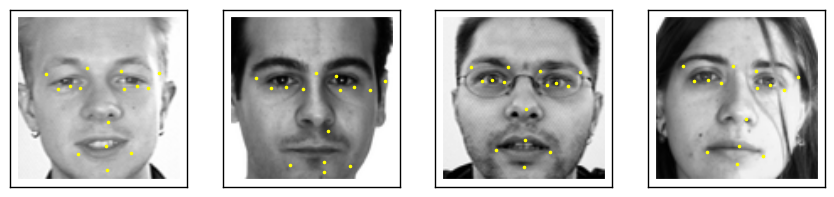

In [14]:
_x = X[0:10]
plots.show_imgs_array(_x, model.predict(_x.reshape(-1, 96, 96, 1)), len(_x), color = 'yellow', nb = 4)

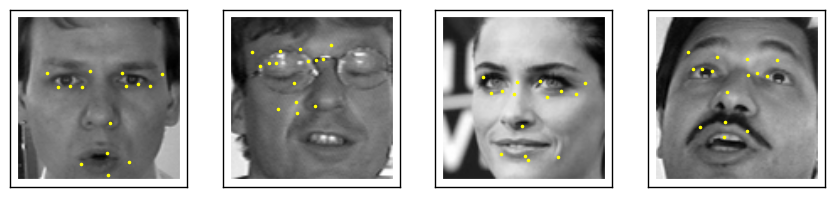

In [15]:
_x = Xvalid[0:10]
plots.show_imgs_array(_x, model.predict(_x.reshape(-1, 96, 96, 1)), len(_x), color = 'yellow', nb = 4)

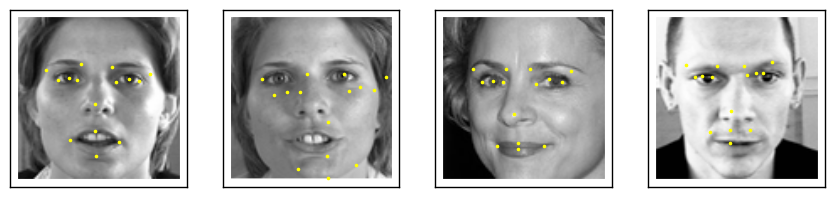

In [17]:
_x = Xtest[0:10]
plots.show_imgs_array(_x, model.predict(_x.reshape(-1, 96, 96, 1)), len(_x), color = 'yellow', nb = 4)

# Is the image still correct after reshaping the input?

In [5]:
row_0_matrix=pickle.load(open("img", "rb"))

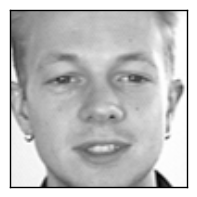

In [22]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(6, 6, 1, xticks=[], yticks=[])
ax.imshow(row_0_matrix.reshape(96, 96), cmap=plt.cm.gray)

In [23]:
row_0_matrix

array([[[ 123.],
        [ 117.],
        [ 118.],
        ..., 
        [ 243.],
        [ 251.],
        [ 251.]],

       [[ 121.],
        [ 124.],
        [ 128.],
        ..., 
        [ 247.],
        [ 248.],
        [ 250.]],

       [[ 125.],
        [ 125.],
        [ 127.],
        ..., 
        [ 247.],
        [ 247.],
        [ 250.]],

       ..., 
       [[ 237.],
        [ 237.],
        [ 239.],
        ..., 
        [ 251.],
        [ 250.],
        [ 251.]],

       [[ 239.],
        [ 237.],
        [ 242.],
        ..., 
        [ 250.],
        [ 251.],
        [ 250.]],

       [[ 240.],
        [ 240.],
        [ 238.],
        ..., 
        [ 249.],
        [ 250.],
        [ 252.]]])

In [26]:
row_0_matrix == row_0_matrix

array([[[ True],
        [ True],
        [ True],
        ..., 
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ..., 
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ..., 
        [ True],
        [ True],
        [ True]],

       ..., 
       [[ True],
        [ True],
        [ True],
        ..., 
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ..., 
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ..., 
        [ True],
        [ True],
        [ True]]], dtype=bool)